<a href="https://colab.research.google.com/github/rodrigorissettoterra/Estatistica_descritiva_com_Python/blob/main/Estat%C3%ADstica_Frequ%C3%AAncia_e_medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estatística descritiva com Python

Site referência: https://www.ibge.gov.br/estatisticas/sociais/trabalho/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=microdados

## Variáveis utilizadas

**Renda:** Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.</br></br>
**Idade:** Idade do morador na data de referência em anos.</br></br>
**Altura:** Altura do morador em metros.</br></br>
**UF:**</br>

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

</br></br>
**Sexo**

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

</br></br>
**Anos de Estudo**

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

</br></br>
**Cor**

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

##Observação

> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

#Preparando o ambiente

##Importando as bibliotecas necessárias

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


##Carregando a base de dados

In [196]:
dados = pd.read_csv('/content/drive/MyDrive/Base de dados/IBGE/dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


##Informações sobre a base de dados

In [197]:
print('Dimensões da base de dados:')
print('A base de dados possui {} linhas e {} colunas.'.format(dados.shape[0], dados.shape[1]))
print('\nContendo algumas das seguintes informações:')
print('A base de dados apresenta idades mínima de %s até %s anos.' % (dados.Idade.min(), dados.Idade.max()))
print('A base de dados apresenta anos de estudos mínimo de %s até %s anos.' % (
    dados['Anos de Estudo'].min(), dados['Anos de Estudo'].max())
)
print('A base de dados apresenta rendas mínima de %s até %s reais.' % (
    dados['Renda'].min(), dados['Renda'].max())
)
print('A base de dados apresenta alturas mínima de %s até %s metro.' % (
    round(dados['Altura'].min(),2),round(dados['Altura'].max(),2))
)

Dimensões da base de dados:
A base de dados possui 76840 linhas e 7 colunas.

Contendo algumas das seguintes informações:
A base de dados apresenta idades mínima de 13 até 99 anos.
A base de dados apresenta anos de estudos mínimo de 1 até 17 anos.
A base de dados apresenta rendas mínima de 0 até 200000 reais.
A base de dados apresenta alturas mínima de 1.34 até 2.03 metro.


Dados faltantes

In [198]:
dados.isna().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

Dados nulos

In [199]:
dados.isnull().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

#Distribuição de frequências

##UF

In [200]:
uf_freq = dados['UF'].value_counts()
uf_freq_porcentagem = dados['UF'].value_counts(normalize = True)*100

uf_distr_freq = pd.DataFrame({'Frequência':uf_freq, 'Porcentagem (%)':uf_freq_porcentagem})
uf_distr_freq.rename(index = {
    11: 'Rondônia',
    12: 'Acre',
    13:	'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}, inplace = True)

uf_distr_freq.rename_axis('Unidade Federativa (UF)', axis ='columns', inplace = True)
uf_distr_freq

Unidade Federativa (UF),Frequência,Porcentagem (%)
São Paulo,8544,11.119209
Minas Gerais,7686,10.002603
Rio Grande do Sul,6322,8.227486
Bahia,5717,7.440135
Rio de Janeiro,5556,7.230609
Pará,4449,5.789953
Paraná,4356,5.668922
Pernambuco,3820,4.971369
Goiás,3478,4.526288
Ceará,3359,4.371421


Histograma

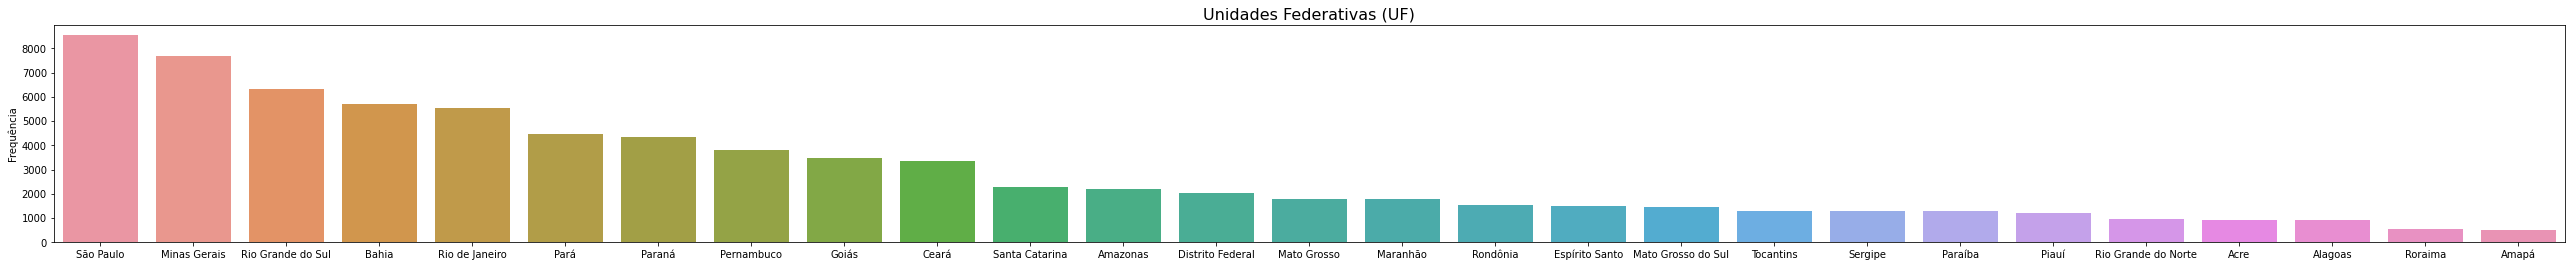

In [201]:
graf_UF = sns.barplot(x = uf_distr_freq.index, y = uf_distr_freq['Frequência'])
graf_UF.figure.set_size_inches(45,4)
graf_UF.set_title('Unidades Federativas (UF)', fontsize = 16)
graf_UF

##Sexo

In [202]:
sex_freq = dados['Sexo'].value_counts()
sex_freq_porcentagem = dados['Sexo'].value_counts(normalize = True)*100

sex_distr_freq = pd.DataFrame({'Frequência':sex_freq, 'Porcentagem (%)':sex_freq_porcentagem})
sex_distr_freq.rename(index = {0:'Masculino',1:'Feminino'}, inplace = True)
sex_distr_freq.rename_axis('Sexo', axis ='columns', inplace = True)
sex_distr_freq

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


Histograma

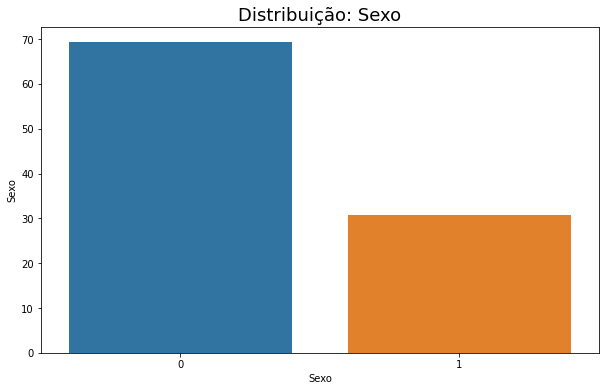

In [203]:
plt.subplots(figsize=(10, 6))
plt.title("Distribuição: Sexo", size = 18)
sns.barplot(x = dados['Sexo'], y = sex_freq_porcentagem)
plt.show()

##Idade

In [204]:
idade_freq = dados['Idade'].value_counts()
idade_freq_porcentagem = dados['Idade'].value_counts(normalize = True)*100

idade_distr_freq = pd.DataFrame({'Frequência':idade_freq, 'Porcentagem (%)':idade_freq_porcentagem})
idade_distr_freq.rename_axis('Idade', axis ='columns', inplace = True)
idade_distr_freq.sort_index()

Idade,Frequência,Porcentagem (%)
13,1,0.001301
14,1,0.001301
15,6,0.007808
16,10,0.013014
17,49,0.063769
...,...,...
92,3,0.003904
94,1,0.001301
95,1,0.001301
97,1,0.001301


Histograma

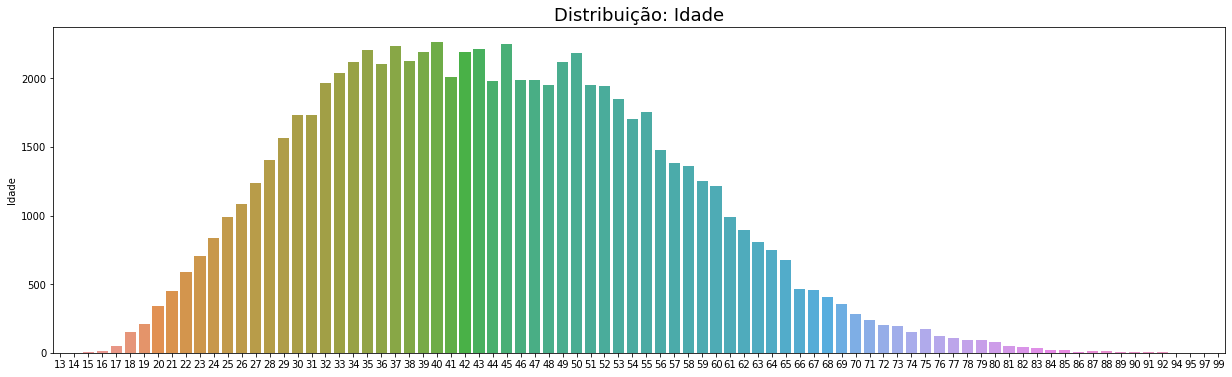

In [205]:
plt.subplots(figsize=(21, 6))
plt.title("Distribuição: Idade", size = 18)
sns.barplot(x = idade_distr_freq.index, y = idade_freq)
plt.show()

Criando uma melhor visualização da distribuição de idade, com boxplot.

[Text(0.5, 1.0, 'Distribuição: Idade')]

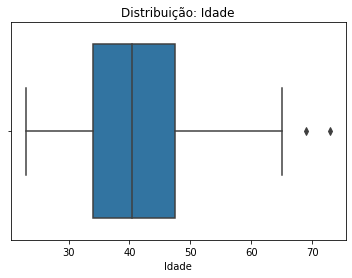

In [206]:
sns.boxplot(data = dados.Idade, x=idade_distr_freq.index, fliersize=5).set(title='Distribuição: Idade')

Apoós a linha de 65 anos, nota-se a existência de alguns outliers.

##Cor

In [207]:
cor_freq = dados['Cor'].value_counts()
cor_freq_porcentagem = dados['Cor'].value_counts(normalize = True)*100

cor_distr_freq = pd.DataFrame({'Frequência':cor_freq, 'Porcentagem (%)':cor_freq_porcentagem})
cor_distr_freq.rename(index = {0:'Indígena',2:'Branca',4:'Preta',6:'Amarela',8:'Parda',9:'Sem declaração'}, inplace = True)
cor_distr_freq.rename_axis('Cor', axis ='columns', inplace = True)
cor_distr_freq

Cor,Frequência,Porcentagem (%)
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indígena,357,0.464602
Amarela,352,0.458095


Histograma

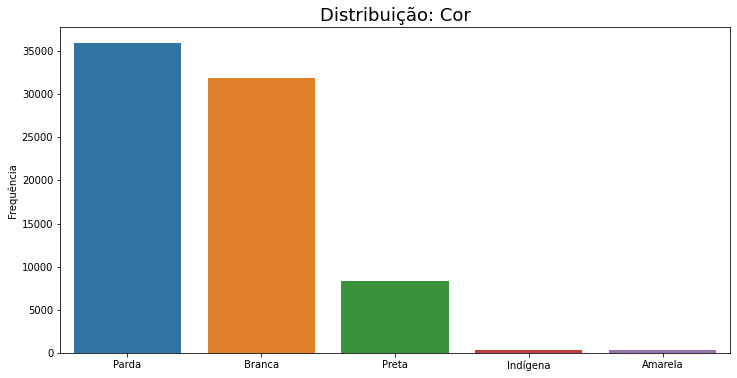

In [208]:
plt.subplots(figsize=(12, 6))
plt.title("Distribuição: Cor", size = 18)
sns.barplot(data = cor_distr_freq, x=cor_distr_freq.index, y = cor_distr_freq['Frequência'])
plt.show()

Segundo a classificação do IBGE, contamos apenas com números pares para a classificação de cor

##Anos de Estudos

In [209]:
anos_freq = dados['Anos de Estudo'].value_counts()
anos_freq_porcentagem = dados['Anos de Estudo'].value_counts(normalize = True)*100

anos_distr_freq = pd.DataFrame({'Frequência':anos_freq, 'Porcentagem (%)':anos_freq_porcentagem})
anos_distr_freq.rename_axis('Anos de Estudo', axis ='columns', inplace = True)
anos_distr_freq.sort_index()

Anos de Estudo,Frequência,Porcentagem (%)
1,5849,7.611921
2,1388,1.806351
3,2101,2.734253
4,2891,3.762363
5,6729,8.757158
6,4499,5.855023
7,2445,3.181936
8,2689,3.499479
9,7980,10.385216
10,1840,2.394586


Distribuição

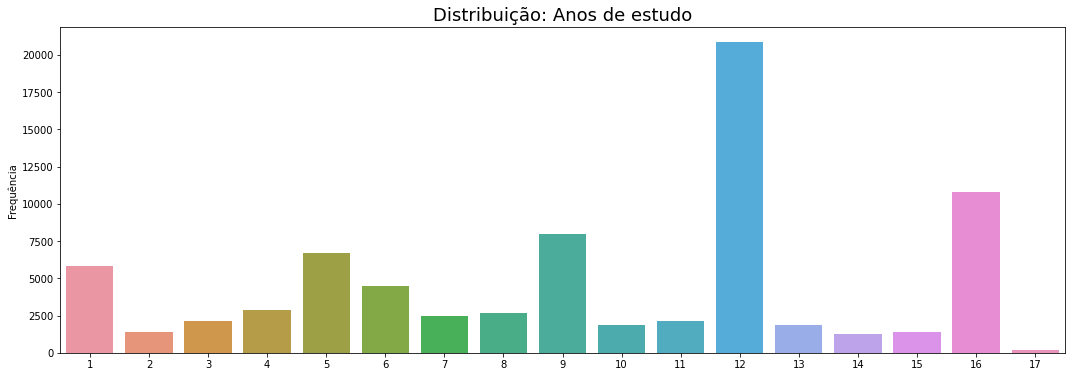

In [210]:
plt.subplots(figsize=(18, 6))
plt.title("Distribuição: Anos de estudo", size = 18)
sns.barplot(x=anos_distr_freq.index, y = anos_distr_freq['Frequência'])
plt.show()

Nota-se picos que representam fechamentos de ciclos de estudos, como Ensino básico:
- Fundamental I: 5 anos,
- Fundamental II: Mais 4 anos, acumulando 9 anos de estudos,
- Médio: Mais 3 anos, acumulando 12 anos de estudos,
- Superior: Mais 4 anos (geralmente), acumulando 16 anos de estudos.

Boxplot

In [211]:
dados_graf_boxplot = pd.DataFrame({'Anos de Estudo':dados['Anos de Estudo'], 'Sexo':dados['Sexo']})
classificacao_sexo = {0:'Masculino',1:'Feminino'}
dados_graf_boxplot['Sexo'] = dados_graf_boxplot['Sexo'].map(classificacao_sexo)
dados_graf_boxplot

,Anos de Estudo,Sexo
0,12,Masculino
1,12,Feminino
2,15,Feminino
3,6,Masculino
4,9,Feminino
...,...,...
76835,11,Feminino
76836,7,Masculino
76837,12,Masculino
76838,4,Masculino


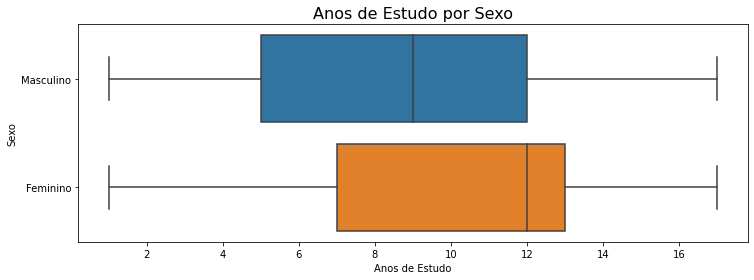

In [212]:
graf_boxplot_sexo = sns.boxplot(x = dados_graf_boxplot['Anos de Estudo'], y = dados_graf_boxplot['Sexo'], data = dados_graf_boxplot, orient = 'h')
graf_boxplot_sexo.figure.set_size_inches(12,4)
graf_boxplot_sexo.set_title('Anos de Estudo por Sexo', fontsize = 16)
graf_boxplot_sexo

##Renda

In [213]:
renda_freq = dados['Renda'].value_counts()
renda_freq_porcentagem = dados['Renda'].value_counts(normalize = True)*100

renda_distr_freq = pd.DataFrame({'Frequência':renda_freq, 'Porcentagem (%)':renda_freq_porcentagem})
renda_distr_freq.rename_axis('Renda', axis ='columns', inplace = True)
renda_distr_freq.sort_index()

Renda,Frequência,Porcentagem (%)
0,2867,3.731130
5,1,0.001301
6,1,0.001301
8,2,0.002603
10,9,0.011713
...,...,...
80000,4,0.005206
90000,1,0.001301
100000,6,0.007808
120000,1,0.001301


Histograma

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


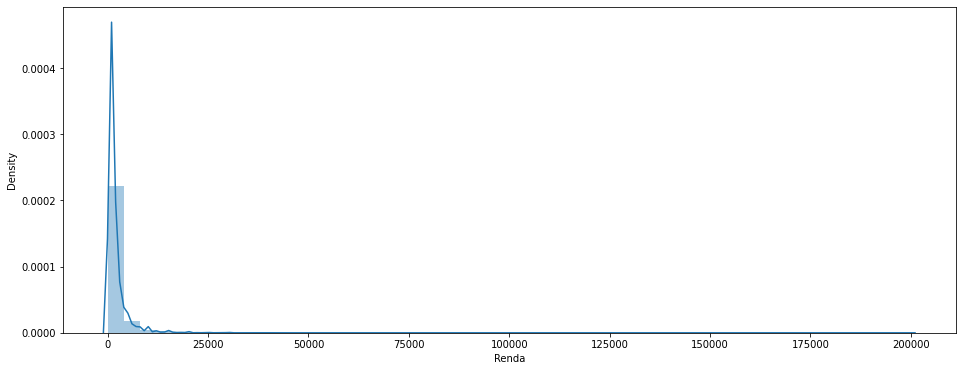

In [214]:
graf_renda = sns.distplot(dados['Renda'])
graf_renda.figure.set_size_inches(16,6)
graf_renda

Nota-se a presença de outliers

Explorando valores abaixo de R$ 15.000,00 de renda (Filtro).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


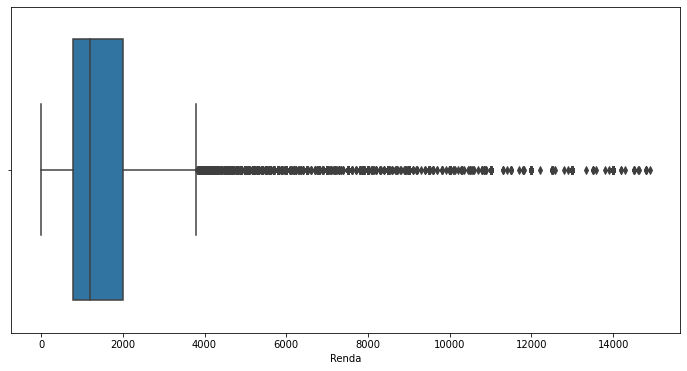

In [215]:
graf_renda_filtro = sns.boxplot(dados.query('Renda < 15000')['Renda'], data = dados)
graf_renda_filtro.figure.set_size_inches(12,6)
graf_renda_filtro

Nova distribuição de frequência da renda, para valores abaixo de R$ 15.000,00

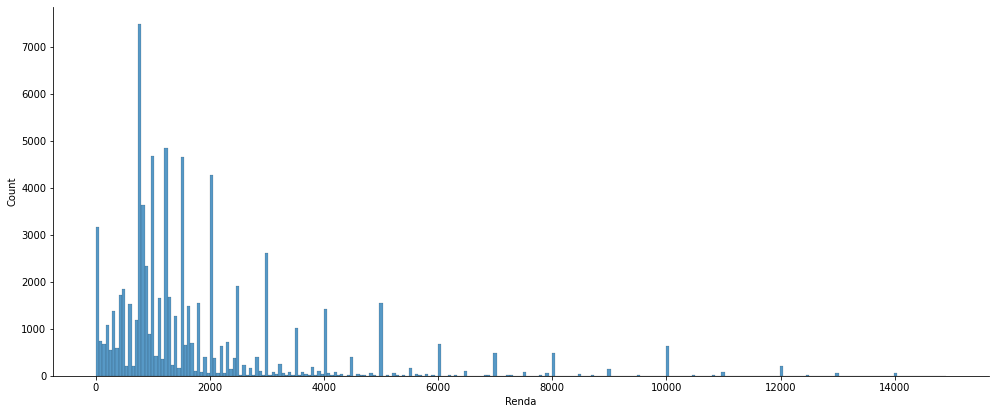

In [216]:
graf_renda_com_filtro = sns.displot(dados.query('Renda < 15000')['Renda'])
graf_renda_com_filtro.figure.set_size_inches(16,6)
graf_renda_com_filtro

Separando a renda por sexo

In [217]:
renda_sexo = pd.DataFrame({'Sexo':dados['Sexo'], 'Renda':dados['Renda']})
renda_sexo

,Sexo,Renda
0,0,800
1,1,1150
2,1,880
3,0,3500
4,1,150
...,...,...
76835,1,812
76836,0,1500
76837,0,1300
76838,0,1500


In [218]:
renda_sexo_filtro = renda_sexo.query('Renda < 15000')
renda_sexo_filtro

,Sexo,Renda
0,0,800
1,1,1150
2,1,880
3,0,3500
4,1,150
...,...,...
76835,1,812
76836,0,1500
76837,0,1300
76838,0,1500


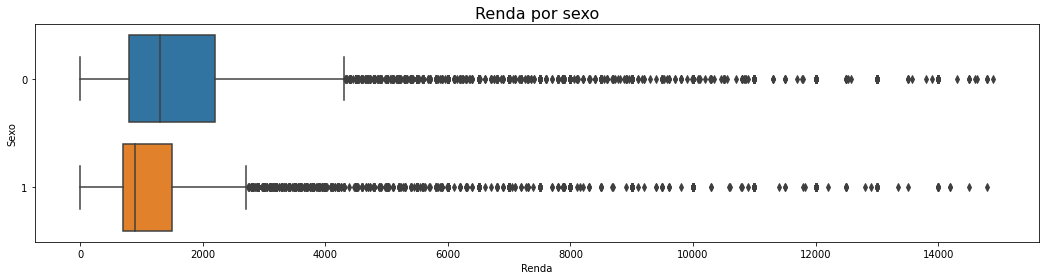

In [219]:
graf_renda_sexo = sns.boxplot(x = renda_sexo_filtro['Renda'], y = renda_sexo_filtro['Sexo'], data = renda_sexo_filtro, orient = 'h')
graf_renda_sexo.figure.set_size_inches(18,4)
graf_renda_sexo.set_title('Renda por sexo', fontsize = 16)
graf_renda_sexo

##Altura

In [220]:
altura_freq = dados['Altura'].value_counts()
altura_freq_porcentagem = dados['Altura'].value_counts(normalize = True)*100

altura_distr_freq = pd.DataFrame({'Frequência':altura_freq, 'Porcentagem (%)':altura_freq_porcentagem})
altura_distr_freq.rename_axis('Altura', axis ='columns', inplace = True)
altura_distr_freq.sort_index()

Altura,Frequência,Porcentagem (%)
1.339245,1,0.001301
1.369494,1,0.001301
1.382390,1,0.001301
1.393778,1,0.001301
1.398523,1,0.001301
...,...,...
2.000559,1,0.001301
2.001359,1,0.001301
2.004185,1,0.001301
2.015830,1,0.001301


Histograma

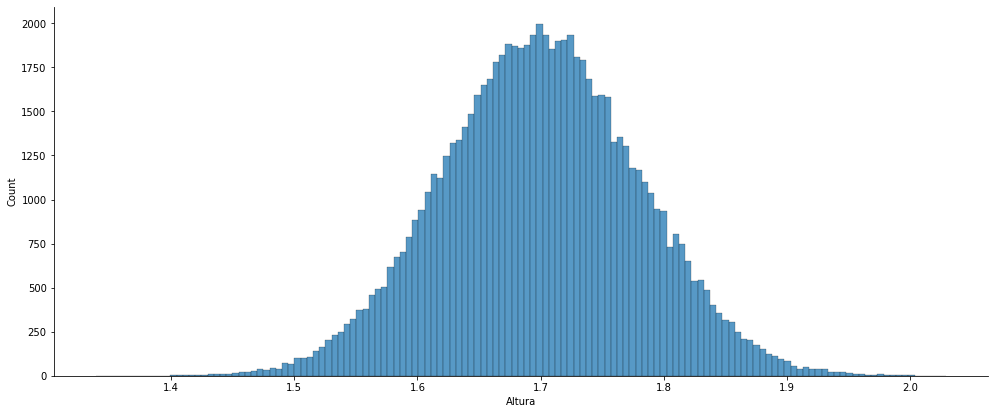

In [221]:
graf_altura = sns.displot(dados['Altura'])
graf_altura.figure.set_size_inches(16,6)
graf_altura

Nota-se uma disstribuição simétrica

Separando a altura por sexo

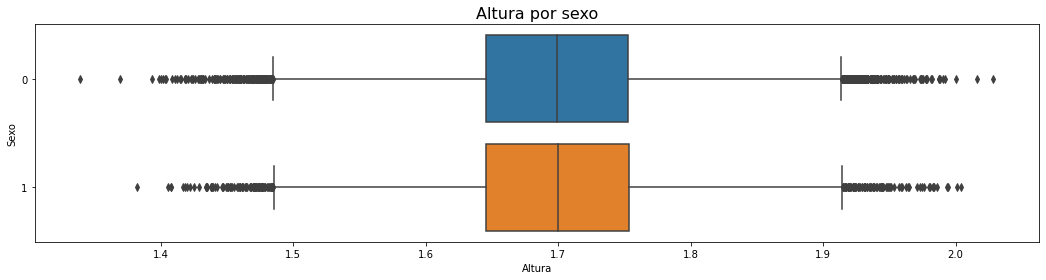

In [222]:
graf_altura_sexo = sns.boxplot(x = dados['Altura'], y = dados['Sexo'], data = dados, orient = 'h')
graf_altura_sexo.figure.set_size_inches(18,4)
graf_altura_sexo.set_title('Altura por sexo', fontsize = 16)
graf_altura_sexo

#Informações estatísticas

In [223]:
dados.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497
